# <img src="https://github.com/JuliaLang/julia-logo-graphics/raw/master/images/julia-logo-color.png" height="100" /> _Colab Notebook Template_

## Instructions
1. Work on a copy of this notebook: _File_ > _Save a copy in Drive_ (you will need a Google account). Alternatively, you can download the notebook using _File_ > _Download .ipynb_, then upload it to [Colab](https://colab.research.google.com/).
2. If you need a GPU: _Runtime_ > _Change runtime type_ > _Harware accelerator_ = _GPU_.
3. Execute the following cell (click on it and press Ctrl+Enter) to install Julia, IJulia and other packages (if needed, update `JULIA_VERSION` and the other parameters). This takes a couple of minutes.
4. Reload this page (press Ctrl+R, or ⌘+R, or the F5 key) and continue to the next section.

_Notes_:
* If your Colab Runtime gets reset (e.g., due to inactivity), repeat steps 2, 3 and 4.
* After installation, if you want to change the Julia version or activate/deactivate the GPU, you will need to reset the Runtime: _Runtime_ > _Factory reset runtime_ and repeat steps 3 and 4.

In [1]:
%%shell
set -e

#---------------------------------------------------#
JULIA_VERSION="1.7.1" # any version ≥ 0.7.0
JULIA_PACKAGES="IJulia BenchmarkTools Plots"
JULIA_PACKAGES_IF_GPU="CUDA" # or CuArrays for older Julia versions
JULIA_NUM_THREADS=2
#---------------------------------------------------#

if [ -n "$COLAB_GPU" ] && [ -z `which julia` ]; then
  # Install Julia
  JULIA_VER=`cut -d '.' -f -2 <<< "$JULIA_VERSION"`
  echo "Installing Julia $JULIA_VERSION on the current Colab Runtime..."
  BASE_URL="https://julialang-s3.julialang.org/bin/linux/x64"
  URL="$BASE_URL/$JULIA_VER/julia-$JULIA_VERSION-linux-x86_64.tar.gz"
  wget -nv $URL -O /tmp/julia.tar.gz # -nv means "not verbose"
  tar -x -f /tmp/julia.tar.gz -C /usr/local --strip-components 1
  rm /tmp/julia.tar.gz

  # Install Packages
  if [ "$COLAB_GPU" = "1" ]; then
      JULIA_PACKAGES="$JULIA_PACKAGES $JULIA_PACKAGES_IF_GPU"
  fi
  for PKG in `echo $JULIA_PACKAGES`; do
    echo "Installing Julia package $PKG..."
    julia -e 'using Pkg; pkg"add '$PKG'; precompile;"' &> /dev/null
  done

  # Install kernel and rename it to "julia"
  echo "Installing IJulia kernel..."
  julia -e 'using IJulia; IJulia.installkernel("julia", env=Dict(
      "JULIA_NUM_THREADS"=>"'"$JULIA_NUM_THREADS"'"))'
  KERNEL_DIR=`julia -e "using IJulia; print(IJulia.kerneldir())"`
  KERNEL_NAME=`ls -d "$KERNEL_DIR"/julia*`
  mv -f $KERNEL_NAME "$KERNEL_DIR"/julia  

  echo ''
  echo "Successfully installed `julia -v`!"
  echo "Please reload this page (press Ctrl+R, ⌘+R, or the F5 key) then"
  echo "jump to the 'Checking the Installation' section."
fi

Unrecognized magic `%%shell`.

Julia does not use the IPython `%magic` syntax.   To interact with the IJulia kernel, use `IJulia.somefunction(...)`, for example.  Julia macros, string macros, and functions can be used to accomplish most of the other functionalities of IPython magics.


# Checking the Installation
The `versioninfo()` function should print your Julia version and some other info about the system:

In [2]:
versioninfo()

Julia Version 1.7.1
Commit ac5cc99908 (2021-12-22 19:35 UTC)
Platform Info:
  OS: Linux (x86_64-pc-linux-gnu)
  CPU: AMD EPYC 7B12
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-12.0.1 (ORCJIT, znver2)
Environment:
  JULIA_NUM_THREADS = 2


In [3]:
using BenchmarkTools

M = rand(2^11, 2^11)

@btime $M * $M;

  391.899 ms (2 allocations: 32.00 MiB)


In [4]:
if ENV["COLAB_GPU"] == "1"
    using CUDA

    run(`nvidia-smi`)

    # Create a new random matrix directly on the GPU:
    M_on_gpu = CUDA.CURAND.rand(2^11, 2^11)
    @btime $M_on_gpu * $M_on_gpu; nothing
else
    println("No GPU found.")
end

No GPU found.


In [5]:
VERSION

v"1.7.1"

# Need Help?

* Learning: https://julialang.org/learning/
* Documentation: https://docs.julialang.org/
* Questions & Discussions:
  * https://discourse.julialang.org/
  * http://julialang.slack.com/
  * https://stackoverflow.com/questions/tagged/julia

If you ever ask for help or file an issue about Julia, you should generally provide the output of `versioninfo()`.

In [6]:
using Pkg
Pkg.add(["BenchmarkTools", "CUDA"])
using BenchmarkTools, CUDA

if has_cuda_gpu()
  print("The GPU device is:", CUDA.device())
end

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
   Installed CEnum ───────── v0.4.2
   Installed TimerOutputs ── v0.5.20
   Installed BFloat16s ───── v0.2.0
   Installed Random123 ───── v1.5.0
   Installed ExprTools ───── v0.1.8
   Installed GPUArrays ───── v8.4.1
   Installed AbstractFFTs ── v1.2.1
   Installed RandomNumbers ─ v1.5.3
   Installed LLVMExtra_jll ─ v0.0.16+0
   Installed GPUArraysCore ─ v0.1.0
   Installed LLVM ────────── v4.14.0
   Installed GPUCompiler ─── v0.16.1
   Installed CUDA ────────── v3.11.0
    Updating `~/.julia/environments/v1.7/Project.toml`
  [052768ef] + CUDA v3.11.0
    Updating `~/.julia/environments/v1.7/Manifest.toml`
  [621f4979] + AbstractFFTs v1.2.1
  [ab4f0b2a] + BFloat16s v0.2.0
  [fa961155] + CEnum v0.4.2
  [052768ef] + CUDA v3.11.0
  [e2ba6199] + ExprTools v0.1.8
  [0c68f7d7] + GPUArrays v8.4.1
  [46192b85] + GPUArraysCore v0.1.0
  [61eb1bfa] + GPUCompiler v0.16.1
  [929cbde3] + LLVM v4.14.0
  [7408

In [8]:
Pkg.add("Bloqade")

   Resolving package versions...
   Installed Calculus ───────────────────────── v0.5.1
   Installed TreeViews ──────────────────────── v0.3.0
   Installed HypergeometricFunctions ────────── v0.3.10
   Installed StatsFuns ──────────────────────── v1.0.1
   Installed LuxorGraphPlot ─────────────────── v0.1.6
   Installed SIMDDualNumbers ────────────────── v0.1.1
   Installed OffsetArrays ───────────────────── v1.12.7
   Installed Rsvg ───────────────────────────── v1.0.0
   Installed PDMats ─────────────────────────── v0.11.16
   Installed Referenceables ─────────────────── v0.1.2
   Installed NonlinearSolve ─────────────────── v0.3.21
   Installed Unitful ────────────────────────── v1.11.0
   Installed Contour ────────────────────────── v0.5.7
   Installed BitBasis ───────────────────────── v0.8.1
   Installed MarchingCubes ──────────────────── v0.1.3
   Installed Bloqade ────────────────────────── v0.1.9
   Installed InlineStrings ──────────────────── v1.1.4
   Installed BloqadeWavefo

In [9]:
using Bloqade

┌ Info: Precompiling Bloqade [bd27d05e-4ce1-5e79-84dd-c5d7d508bbe1]
└ @ Base loading.jl:1423
┌ Warning: Module ChainRulesCore with build ID 116700713191 is missing from the cache.
│ This may mean ChainRulesCore [d360d2e6-b24c-11e9-a2a3-2a2ae2dbcce4] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1107
┌ Warning: Module ChainRulesCore with build ID 116700713191 is missing from the cache.
│ This may mean ChainRulesCore [d360d2e6-b24c-11e9-a2a3-2a2ae2dbcce4] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1107
┌ Warning: Module ChainRulesCore with build ID 116700713191 is missing from the cache.
│ This may mean ChainRulesCore [d360d2e6-b24c-11e9-a2a3-2a2ae2dbcce4] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1107
┌ Warning: Module ChainRulesCore with build ID 116700713191 is missing from the cache.
│ This may mean ChainRulesCore [d360d2e6-b24c-11e9-a2a3-2a2ae

# Import and Install Required Packages

In [18]:
using Pkg
Pkg.add(["Bloqade", "PythonCall", "KrylovKit", "SparseArrays"])
using Bloqade, PythonCall, KrylovKit, SparseArrays 

#import Pkg; Pkg.add("Bloqade")
#import Pkg; Pkg.add("PythonCall")
#import Pkg; Pkg.add("KrylovKit")
#import Pkg; Pkg.add("SparseArrays")

plt = pyimport("matplotlib.pyplot");

   Resolving package versions...
    Updating `~/.julia/environments/v1.7/Project.toml`
  [0b1a1467] + KrylovKit v0.5.4
  [6099a3de] + PythonCall v0.9.3
  [2f01184e] + SparseArrays
  No Changes to `~/.julia/environments/v1.7/Manifest.toml`


## Task 1: Simulating the preparation of a quantum state in a 1D Rydberg atom array of 9 sites.


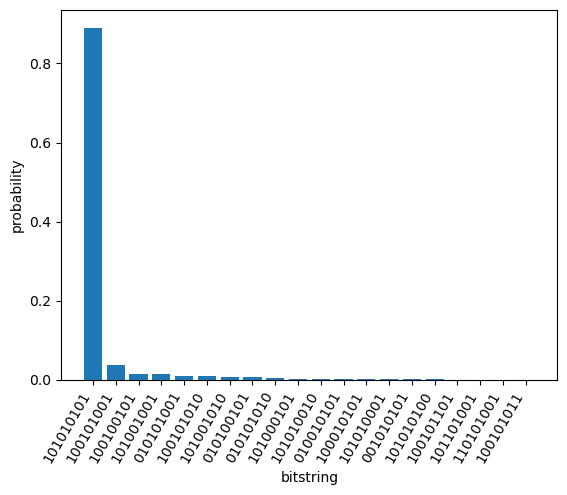

In [19]:
nsites = 9
atoms = generate_sites(ChainLattice(), nsites, scale = 5.72)

Ω = 2π * 4
Δ_step = 30
Δ = LinRange(-2π * 10, 2π * 10, Δ_step);

density_g = zeros(Δ_step, nsites)

for ii in 1:Δ_step
    h_ii = rydberg_h(atoms; Δ = Δ[ii], Ω) # create the Rydberg Hamiltonian
    h_m = mat(h_ii) # convert the Hamiltonian into a matrix
    vals, vecs, info = KrylovKit.eigsolve(h_m, 1, :SR) # find the ground state eigenvalue and eigenvector
    g_state = ArrayReg(vecs[1]) # creates the initial state with all atoms in ``| 0 \rangle`` state

    for jj in 1:nsites
        density_g[ii, jj] = rydberg_density(g_state, jj) # measure the density of Rydberg excitations on each site
    end
end

fig, ax = plt.subplots(figsize = (10, 4))
ax.bar(1:nsites, density_g[1, :])
ax.set_xticks(1:nsites)
ax.set_xlabel("Sites")
ax.set_ylabel("Rydberg density")
ax.set_title("Density Profile: 1D Chain, Δ = -2π * 10 MHz")
fig

fig, ax = plt.subplots(figsize = (10, 4))
ax.bar(1:nsites, density_g[30, :])
ax.set_xticks(1:nsites)
ax.set_xlabel("Sites")
ax.set_ylabel("Rydberg density")
ax.set_title("Density Profile: 1D Chain, Δ = 2π * 10 MHz")
fig

order_para = map(1:Δ_step) do ii
    return sum(density_g[ii, 1:2:nsites]) - sum(density_g[ii, 2:2:nsites])
end

fig, ax = plt.subplots(figsize = (10, 4))
ax.plot(Δ / 2π, order_para)
ax.set_xlabel("Δ/2π (MHz) ")
ax.set_ylabel("Order parameter")
fig

total_time = 3.0;
Ω_max = 2π * 4;
Ω = piecewise_linear(clocks = [0.0, 0.1, 2.1, 2.2, total_time], values = [0.0, Ω_max, Ω_max, 0, 0]);

U1 = -2π * 10;
U2 = 2π * 10;
Δ = piecewise_linear(clocks = [0.0, 0.6, 2.1, total_time], values = [U1, U1, U2, U2]);

fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (12, 4))
Bloqade.plot!(ax1, Ω)
ax1.set_ylabel("Ω/2π (MHz)")
Bloqade.plot!(ax2, Δ)
ax2.set_ylabel("Δ/2π (MHz)")
fig

nsites = 9
atoms = generate_sites(ChainLattice(), nsites, scale = 5.72)

h = rydberg_h(atoms; Δ, Ω)

reg = zero_state(9);
prob = SchrodingerProblem(reg, total_time, h);
integrator = init(prob, Vern8());

densities = []
for _ in TimeChoiceIterator(integrator, 0.0:1e-3:total_time)
    push!(densities, rydberg_density(reg))
end
D = hcat(densities...);

fig, ax = plt.subplots(figsize = (10, 4))
shw = ax.imshow(real(D), interpolation = "nearest", aspect = "auto", extent = [0, total_time, 0.5, nsites + 0.5])
ax.set_xlabel("time (μs)")
ax.set_ylabel("site")
ax.set_xticks(0:0.2:total_time)
ax.set_yticks(1:nsites)
bar = fig.colorbar(shw)
fig

bitstring_hist(reg; nlargest = 20)

# Task 2a

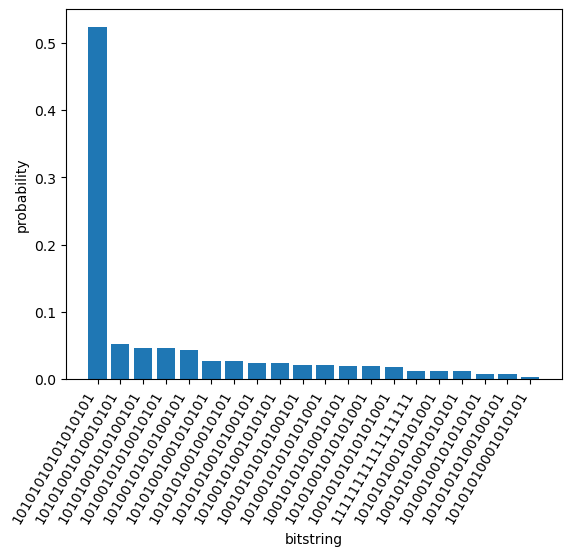

In [20]:
"""Task 2 part a
17 atoms seems to be the maximum amout, when it goes to 19 atoms the bit strings all go to "ones".
"""

nsites = 17
atoms = generate_sites(ChainLattice(), nsites, scale = 5.72)

Ω = 2π * 4
Δ_step = 30
Δ = LinRange(-2π * 10, 2π * 10, Δ_step);

density_g = zeros(Δ_step, nsites)

for ii in 1:Δ_step
    h_ii = rydberg_h(atoms; Δ = Δ[ii], Ω) # create the Rydberg Hamiltonian
    h_m = mat(h_ii) # convert the Hamiltonian into a matrix
    vals, vecs, info = KrylovKit.eigsolve(h_m, 1, :SR) # find the ground state eigenvalue and eigenvector
    g_state = ArrayReg(vecs[1]) # creates the initial state with all atoms in ``| 0 \rangle`` state

    for jj in 1:nsites
        density_g[ii, jj] = rydberg_density(g_state, jj) # measure the density of Rydberg excitations on each site
    end
end

fig, ax = plt.subplots(figsize = (10, 4))
ax.bar(1:nsites, density_g[1, :])
ax.set_xticks(1:nsites)
ax.set_xlabel("Sites")
ax.set_ylabel("Rydberg density")
ax.set_title("Density Profile: 1D Chain, Δ = -2π * 10 MHz")
fig

fig, ax = plt.subplots(figsize = (10, 4))
ax.bar(1:nsites, density_g[30, :])
ax.set_xticks(1:nsites)
ax.set_xlabel("Sites")
ax.set_ylabel("Rydberg density")
ax.set_title("Density Profile: 1D Chain, Δ = 2π * 10 MHz")
fig

order_para = map(1:Δ_step) do ii
    return sum(density_g[ii, 1:2:nsites]) - sum(density_g[ii, 2:2:nsites])
end

fig, ax = plt.subplots(figsize = (10, 4))
ax.plot(Δ / 2π, order_para)
ax.set_xlabel("Δ/2π (MHz) ")
ax.set_ylabel("Order parameter")
fig

total_time = 3.0;
Ω_max = 2π * 4;
Ω = piecewise_linear(clocks = [0.0, 0.1, 2.1, 2.2, total_time], values = [0.0, Ω_max, Ω_max, 0, 0]);

U1 = -2π * 10;
U2 = 2π * 10;
Δ = piecewise_linear(clocks = [0.0, 0.6, 2.1, total_time], values = [U1, U1, U2, U2]);

fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (12, 4))
Bloqade.plot!(ax1, Ω)
ax1.set_ylabel("Ω/2π (MHz)")
Bloqade.plot!(ax2, Δ)
ax2.set_ylabel("Δ/2π (MHz)")
fig

nsites = 17
atoms = generate_sites(ChainLattice(), nsites, scale = 5.72)

h = rydberg_h(atoms; Δ, Ω)

reg = zero_state(17);
prob = SchrodingerProblem(reg, total_time, h);
integrator = init(prob, Vern8());

densities = []
for _ in TimeChoiceIterator(integrator, 0.0:1e-3:total_time)
    push!(densities, rydberg_density(reg))
end
D = hcat(densities...);

fig, ax = plt.subplots(figsize = (10, 4))
shw = ax.imshow(real(D), interpolation = "nearest", aspect = "auto", extent = [0, total_time, 0.5, nsites + 0.5])
ax.set_xlabel("time (μs)")
ax.set_ylabel("site")
ax.set_xticks(0:0.2:total_time)
ax.set_yticks(1:nsites)
bar = fig.colorbar(shw)
fig

bitstring_hist(reg; nlargest = 20)

# Task 2b

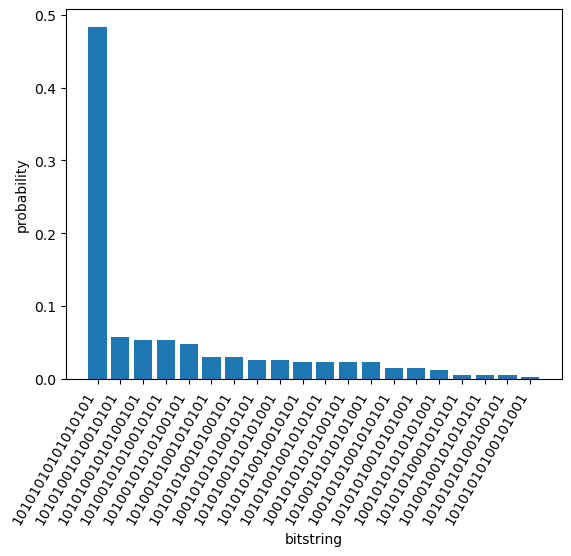

In [21]:
"""Task 2 part b
Comparing the blockade approximation of 17 atoms relative to initial amount of 9 atoms
"""

space = blockade_subspace(atoms, 5.73);

reg = zero_state(space)

prob = SchrodingerProblem(reg, total_time, h)
emulate!(prob)
bitstring_hist(prob.reg; nlargest = 20)

# Task 3a

In [22]:
using Pkg
Pkg.add(["Bloqade", "Graphs", "Random", "GenericTensorNetworks", "Optim", "PythonCall"])
using Bloqade, Graphs, Random, GenericTensorNetworks, Optim, PythonCall

plt = pyimport("matplotlib.pyplot");

#import Pkg; Pkg.add("Graphs")
#import Pkg; Pkg.add("Random")
#import Pkg; Pkg.add("GenericTensorNetworks")
#import Pkg; Pkg.add("Optim")
#import Pkg; Pkg.add("Bloqade")
#import Pkg; Pkg.add("PythonCall")

#plt = pyimport("matplotlib.pyplot");

"""Finding the solution for a Maximum Independent Set (MIS) problem using the adiabatic approach.
In this initial 4x4 DUGG setup the MIS size is 4, and the number of maximum independent sets is 26.
"""

Random.seed!(2)
atoms = generate_sites(SquareLattice(), 4, 4; scale = 4.5) |> random_dropout(0.2)

Bloqade.plot(atoms, blockade_radius = 7.5)

graph = BloqadeMIS.unit_disk_graph(atoms, 7.5)
mis_size_and_counting = GenericTensorNetworks.solve(IndependentSet(graph), CountingMax())[]

T_max = 0.6
Ω_max = 2π * 4
Ω = piecewise_linear(clocks = [0.0, 0.1, 0.5, T_max], values = [0.0, Ω_max, Ω_max, 0])
Δ_start = -2π * 13
Δ_end = 2π * 11
Δ = piecewise_linear(clocks = [0.0, 0.1, 0.5, T_max], values = [Δ_start, Δ_start, Δ_end, Δ_end])

fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (12, 4))
Bloqade.plot!(ax1, Ω)
ax1.set_ylabel("Ω/2π (MHz)")
Bloqade.plot!(ax2, Δ)
ax2.set_ylabel("Δ/2π (MHz)")
fig

hamiltonian = rydberg_h(atoms; Ω = Ω, Δ = Δ)
prob = SchrodingerProblem(zero_state(nqubits(hamiltonian)), T_max, hamiltonian)
emulate!(prob)

bitstring_hist(prob.reg; nlargest = 20)

best_bit_strings = most_probable(prob.reg, 2)
all_optimal_configs = GenericTensorNetworks.solve(IndependentSet(graph), ConfigsMax())[]
@assert all(bs -> GenericTensorNetworks.StaticBitVector([bs...]) ∈ all_optimal_configs.c, best_bit_strings)

Bloqade.plot(atoms, blockade_radius = 7.5; colors = [iszero(b) ? "white" : "red" for b in best_bit_strings[1]])

Bloqade.plot(atoms, blockade_radius = 7.5; colors = [iszero(b) ? "white" : "red" for b in best_bit_strings[2]])

best5_bit_strings = most_probable(prob.reg, 3)
BloqadeMIS.is_independent_set.(best5_bit_strings, Ref(graph))

fixed = mis_postprocessing(best5_bit_strings[3], graph)
BloqadeMIS.is_independent_set(fixed, graph)

   Resolving package versions...
   Installed Mods ────────────────────── v1.3.2
   Installed IntelOpenMP_jll ─────────── v2018.0.3+2
   Installed BatchedRoutines ─────────── v0.2.2
   Installed OMEinsumContractionOrders ─ v0.6.9
   Installed FFTW ────────────────────── v1.5.0
   Installed MutableArithmetics ──────── v1.0.4
   Installed Polynomials ─────────────── v3.1.4
   Installed GenericTensorNetworks ───── v1.2.0
   Installed PositiveFactorizations ──── v0.2.4
   Installed FFTW_jll ────────────────── v3.3.10+0
   Installed IntegerMathUtils ────────── v0.1.0
   Installed MKL_jll ─────────────────── v2022.0.0+0
   Installed Suppressor ──────────────── v0.2.1
   Installed Combinatorics ───────────── v1.0.2
   Installed AbstractTrees ───────────── v0.3.4
   Installed OMEinsum ────────────────── v0.6.13
   Installed BetterExp ───────────────── v0.1.0
   Installed Primes ──────────────────── v0.5.3
   Installed TropicalNumbers ─────────── v0.5.3
   Installed Optim ───────────────────── 

true

# Task 3b

In [23]:
"""Task 3 part b
In this scaled up 26 x 26, DUGG setup the MIS size is 162, and the number of maximum independent sets is 6.2626787235072e14 !!!!.
Attemps to create DUGGS, greater than 26 X 26 take an extremely long time to calculate not sure if this is the max but this is the largest that was acheived without waiting for some extended period time without any ouput from the cell.
"""

Random.seed!(2)
atoms = generate_sites(SquareLattice(), 26, 26; scale = 4.5) |> random_dropout(0.2)

Bloqade.plot(atoms, blockade_radius = 7.5)

graph = BloqadeMIS.unit_disk_graph(atoms, 7.5)
mis_size_and_counting = GenericTensorNetworks.solve(IndependentSet(graph), CountingMax())[]


tcmalloc: large alloc 2147483648 bytes == 0x50c9c000 @  0x7f9db5262b6b 0x7f9db5282379 0x7f9db370ae18 0x7f9db36d4b3c 0x7f9d6e0aa183 0x7f9d6e0b5e61 0x7f9d6e0b5ebf 0x7f9db36ade0a 0x7f9d6e0950d2 0x7f9db36ade0a 0x7f9d6e08eda3 0x7f9d6e08ee69 0x7f9db36ade0a 0x7f9d6e08cbe2 0x7f9db36ade0a 0x7f9d6e08ca97 0x7f9db36ade0a 0x7f9d6e08ca97 0x7f9db36ade0a 0x7f9d6e08ca97 0x7f9db36ade0a 0x7f9d6e08ca97 0x7f9db36ade0a 0x7f9d6e08ca97 0x7f9db36ade0a 0x7f9d6e08b496 0x7f9db36ade0a 0x7f9db36c0159 0x7f9d6e08b36e 0x7f9db36ade0a 0x7f9db36c0159
tcmalloc: large alloc 2147483648 bytes == 0xd5c9c000 @  0x7f9db5262b6b 0x7f9db5282379 0x7f9db370ae18 0x7f9db36d3554 0x7f9db36d3fa8 0x7f9d6dea1369 0x7f9db36ade0a 0x7f9d6def669f 0x7f9d6def67a2 0x7f9db36ade0a 0x7f9d6dee65e7 0x7f9d6def5b7f 0x7f9db36ade0a 0x7f9d6e094833 0x7f9db36ade0a 0x7f9d6e08eda3 0x7f9d6e08ee69 0x7f9db36ade0a 0x7f9d6e08cbe2 0x7f9db36ade0a 0x7f9d6e08ca97 0x7f9db36ade0a 0x7f9d6e08ca97 0x7f9db36ade0a 0x7f9d6e08ca97 0x7f9db36ade0a 0x7f9d6e08ca97 0x7f9db36ade0a 0x7

(162.0, 6.2626787235072e14)ₜ